# Filtern - Metadaten

In [ ]:
from dakoda.query import field, value
from dakoda.corpus import DakodaCorpus
import seaborn as sns 
import polars as pl

corpus = DakodaCorpus("data/merlin")
print(f'Corpus {corpus.name} contains {len(corpus)} documents')

cefr = 'A1'
query = field("text_proficiency_cefrMax") & value(cefr)

docs = list(corpus[query])
print('{} documents with CEFR level {} found'.format(len(docs), cefr))
for doc in docs[:10]:
    print(doc.text[:100])

Corpus merlin contains 1033 documents
57 documents with CEFR level A1 found
Liebe Maria , HLoo . Ich gehe nach schwimmen , und Ich möchten sosammen gehen vier hast lustig . Kom
Liebe Ingo Kannst du mir bitte Hilfe bei der Wohnungs suche . Ich habe der Größ Neue Wohnung in Neub
Lieber Jens , Ich Glückwünsche dich ist Vater geworden . Wie es deine Frau und deine Babys ? Wie hei
Lieber Ingo , Wie geht dir ? Ich habe eine Arbeit in Neuburg gefunden . Ich brauch eine neue Wohnung
Lieber Jens 31.05.2012 Stadt X herzlich Glückwünsche haben jetes eine Name für Inen Kind und wigsset
Stadt X. 26 - 4 - 12 Liber Jens du bist glücklish wie get es das Beby michael ? Ich hofe vile Gruße 
Lieber Jens , den 31 - 05 - 12 Stadt X ich Glückwünsche des Baby und ganze Familie . Sagen Sie bitte
Lieber Grüße Stadt X 26 - 04 - 12 Name des Babys Tobias der Muter er ist Eva des gehet in Kinigard
Stadt X , 26,04,12 Lieber Jens , Ich hörren er Vater ist geworden . Das ich prima und Glückwünsche .
Stadt X 26.04.201

<Axes: xlabel='CEFR', ylabel='Count'>

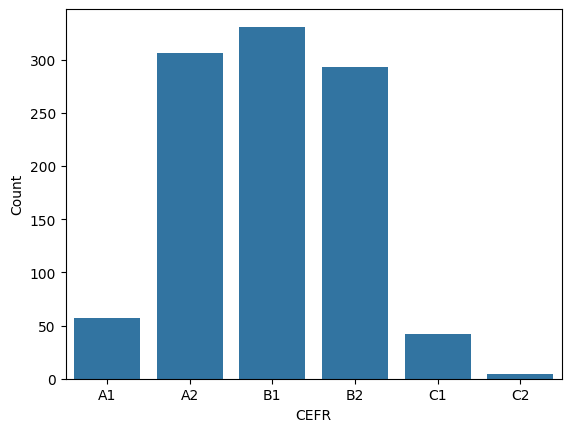

In [16]:
rows = []
cefr_levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
for cefr in cefr_levels:
    query = field("text_proficiency_cefrMax") & value(cefr)
    docs = list(corpus[query])
    rows.append({'CEFR': cefr,  'Count': len(docs)})
df = pl.DataFrame(rows)

sns.barplot(x=df['CEFR'], y=df['Count'])


In [ ]:
# plt = sns.barplot(x=l1_counts.index, y=l1_counts.values)
# plt.tick_params(axis='x', labelrotation=70)

## Exportieren

Die Metadaten können wir dann auch exportieren.

In [ ]:
# export metadata from full corpus or from query result
